# MNIST Notebook example
Example of [mnist.py] use. It is also the code used to submit our prediction to the <b>[Kaggle digit-recognizer Challenge](https://www.kaggle.com/competitions/digit-recognizer/overview)</b><br>


In [1]:
from MNIST import MNIST_data, MNIST, MNIST_gridSearch

import torch.nn as nn

import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim

import torchvision.transforms as transforms


In [2]:
class Paul2(nn.Module):
    def __init__(self):
        super(Paul2, self).__init__()

        self.conv1 = nn.Conv2d(1, 8, kernel_size=5, stride = 1, padding = 0)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.conv2 = nn.Conv2d(8, 16, kernel_size=5, stride = 1, padding = 0)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.fc1 = nn.Linear(4*4*16, 56)
        self.fc2 = nn.Linear(56, 10)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.pool1(out)
        
        out = F.relu(self.conv2(out))
        out = self.pool2(out)

        out = out.view(-1, 4*4*16)

        out = F.relu(self.fc1(out))
        out = self.fc2(out)

        return out

### Gridsearch

In [3]:
batch_sizes = [16, 32]
lrs = [0.0005, 0.0007, 0.0009]
epochs = [20, 30]
model = Paul2()
criterions = [nn.CrossEntropyLoss]
optimizers = [optim.AdamW]

data = MNIST_data('train.csv', 'test.csv', 16, 0.8) # The batch_size parameter does not matter here.
mnist = MNIST(data)
grid_search = MNIST_gridSearch(model, mnist, criterions, optimizers, epochs, lrs, batch_sizes)

best_param, best_model = grid_search.gridSearch(verbose = 2)
best_param

Iteration 1 / 12 | score : 0.9860714285714286 | epoch : 20
Iteration 2 / 12 | score : 0.9827380952380952 | epoch : 20
Iteration 3 / 12 | score : 0.9835714285714285 | epoch : 20
Iteration 4 / 12 | score : 0.983452380952381 | epoch : 30
Iteration 5 / 12 | score : 0.985 | epoch : 30
Iteration 6 / 12 | score : 0.9840476190476191 | epoch : 30
Iteration 7 / 12 | score : 0.9872375954198473 | epoch : 20
Iteration 8 / 12 | score : 0.9852099236641222 | epoch : 20
Iteration 9 / 12 | score : 0.9824666030534351 | epoch : 20
Iteration 10 / 12 | score : 0.9836593511450382 | epoch : 30
Iteration 11 / 12 | score : 0.9858062977099237 | epoch : 30
Iteration 12 / 12 | score : 0.9809160305343512 | epoch : 30


{'optimizer': torch.optim.adamw.AdamW,
 'criterion': torch.nn.modules.loss.CrossEntropyLoss,
 'epochs': 20,
 'learning_rate': 0.0005,
 'batch_size': 32,
 'score': 0.9872375954198473}

### Single hyperparameter combination model training

In [4]:
model = Paul2()
data = MNIST_data('train.csv', 'test.csv', 16, 0.8)
mnist = MNIST(data)

output = mnist.train(model, nn.CrossEntropyLoss(), optim.AdamW(model.parameters(), lr=0.005), 1, verbose=1)

mnist.evaluation(model)

0 / 1


0.9775

### Training a model on the whole dataset

In [5]:
# Do once you have a satisfying model
final_model = Paul2()
data = MNIST_data('train.csv', 'test.csv', 32, 0.8)
mnist = MNIST(data)

mnist.train_to_submit(final_model, nn.CrossEntropyLoss(), optim.AdamW(final_model.parameters(), lr=0.0005), 20, verbose=1)

0 / 20
1 / 20
2 / 20
3 / 20
4 / 20
5 / 20
6 / 20
7 / 20
8 / 20
9 / 20
10 / 20
11 / 20
12 / 20
13 / 20
14 / 20
15 / 20
16 / 20
17 / 20
18 / 20
19 / 20


{'training_loss': [2.3000266551971436,
  2.277672052383423,
  2.30710506439209,
  2.306743860244751,
  2.296015977859497,
  2.3101563453674316,
  2.294160842895508,
  2.291856050491333,
  2.282994031906128,
  2.287358045578003,
  2.277153253555298,
  2.290510416030884,
  2.2864832878112793,
  2.286536455154419,
  2.281562566757202,
  2.260345935821533,
  2.2816882133483887,
  2.2629196643829346,
  2.2730331420898438,
  2.255784511566162,
  2.246581554412842,
  2.2577476501464844,
  2.242367744445801,
  2.264585256576538,
  2.260826349258423,
  2.2067439556121826,
  2.2185819149017334,
  2.198298692703247,
  2.2127041816711426,
  2.195211410522461,
  2.1681480407714844,
  2.1807942390441895,
  2.1910505294799805,
  2.1958885192871094,
  2.1506972312927246,
  2.1763017177581787,
  2.1148133277893066,
  2.1343448162078857,
  2.1373162269592285,
  2.1455209255218506,
  2.1253979206085205,
  2.0778682231903076,
  2.112663507461548,
  2.1104681491851807,
  2.1008942127227783,
  2.05454778671

### Submission

In [6]:
mnist.submit(final_model)

File created, ready to submit.


### Quick visualization for hints of future improvements

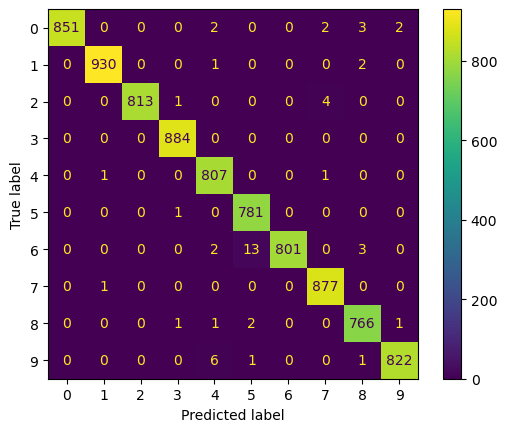

In [7]:
mnist.confusion_matrix_evaluation(final_model)